# Implementation of an OLS solver

In this exercise, you will implement your own function for solving OLS regression problems in Python.

The function takes the data samples in matrix-form ($X$, $y$) as inputs and returns the minimizing solution $\beta$ as well as the remaining error $\mathcal{L}(\beta)$.

In [7]:
# Imports
import sys
sys.path.append(r'C:\Users\tscha\BAML\.venv\Lib\site-packages')

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### Exercise H2.1

Forecasted demand for t = 10: 147.21555555555557
RMSE: 1.755016794967297
Forecasted demand for t = 10 (with seasonality): 147.48429553264603


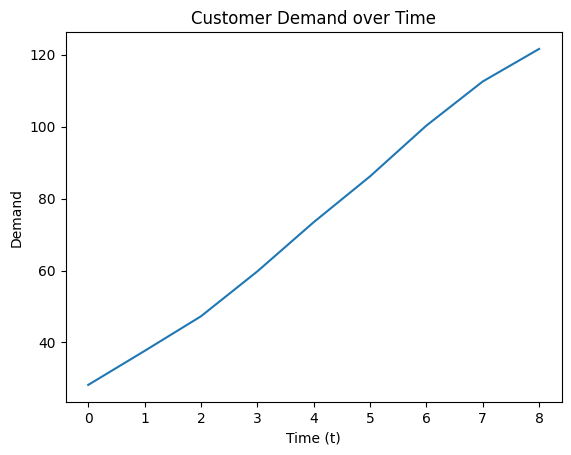

In [8]:
t = np.array([0,1,2,3,4,5,6,7,8])

demand = np.array ([28.20, 37.65, 47.28, 59.76, 73.44, 86.19, 100.31, 112.58, 121.63])

X = np.vstack([np.ones(len(t)), t]).T  # Adding intercept column (ones)
beta = np.linalg.inv(X.T @ X) @ X.T @ demand  # Beta values

beta_0, beta_1 = beta

# Forecast for t = 10
t_forecast = 10
forecasted_demand = beta_0 + beta_1 * t_forecast
print(f"Forecasted demand for t = 10: {forecasted_demand}")

# Calculate predicted demand (y_hat) for each time period
y_hat = X @ beta

# Calculate RMSE
rmse = np.sqrt(np.mean((y_hat - demand) ** 2))
print(f"RMSE: {rmse}")

# Create the seasonal component (Q1) for each time period
Q1 = np.array([0, 0, 1, 1, 0, 0, 1, 1, 0])

# Create the design matrix with intercept, t, and Q1
X_seasonal = np.vstack([np.ones(len(t)), t, Q1]).T

# Perform linear regression to find beta_0, beta_1, and beta_2
beta_seasonal = np.linalg.inv(X_seasonal.T @ X_seasonal) @ X_seasonal.T @ demand

# Extract beta_0, beta_1, and beta_2
beta_0_seasonal, beta_1_seasonal, beta_2_seasonal = beta_seasonal

# Forecast for t = 10 with the seasonal component
Q1_forecast = 0  # As we are forecasting for t = 10, which corresponds to Q1 = 0
forecasted_demand_seasonal = beta_0_seasonal + beta_1_seasonal * t_forecast + beta_2_seasonal * Q1_forecast
print(f"Forecasted demand for t = 10 (with seasonality): {forecasted_demand_seasonal}")

# Plot the demand data
plt.plot(t, demand, label='Actual Demand')
plt.title("Customer Demand over Time")
plt.xlabel("Time (t)")
plt.ylabel("Demand")
plt.show()

## Exercise a)

Implement the function.

In [9]:
def fit_parameters(X, y):
    """Compute optimal parameters by least-squares regression.

    Args:
        X (np.ndarray): The input variables, containing intercept variables if required.
        y (np.ndarray): The target variables.

    Returns:
        np.ndarray: The parameter vector (beta)
        float: The remaining loss
    """
    beta = np.linalg.solve(X.T @ X, X.T @ y)
    predicted = X @ beta
    loss = np.square(predicted - y).sum()
    return beta, loss

## Exercise b)

For our provided toy data set (*ols-implementation-data.csv*), find the optimal regression parameters with the help of your implementation. Don't forget to add a variable for the intercept parameter!

In [11]:
# Load dataset
data = pd.read_csv("ols-implementation-data.csv")
X = data[["x1", "x2"]].to_numpy()
y = data["y"].to_numpy()

# Add intercept variables
x_intercept = np.hstack([np.ones([X.shape[0], 1]), X])

# Find optimal parameter values
beta, loss = fit_parameters(x_intercept, y) # TODO
print(f"Parameters by our model: {beta}")
print(f"Loss by our model: {loss:.2f}\n")

Parameters by our model: [47.81880739 -0.25241394  3.38759361]
Loss by our model: 96199.44



## Exercise c)

Repeat b) with the aid of scikit-learn [``LinearRegression``](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and verify your solution.

In [12]:
# Using scikit-learn
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
beta_skl = np.array([model.intercept_, *model.coef_])
y_pred_skl = model.predict(X)
loss_skl = np.square(y_pred_skl - y).sum()
print(f"Parameters by scikit-learn: {beta_skl}")
print(f"Loss by scikit-learn: {loss_skl:.2f}")

Parameters by scikit-learn: [47.81880739 -0.25241394  3.38759361]
Loss by scikit-learn: 96199.44


## Exercise d)

How much of the total variance can you explain with your model? Compute the R^2 measure. What happens if you forget about the intercept? How does the R^2 measure compare?

In [15]:
# R^2 measure
tss = np.square(y - y.mean()).sum()
rss = np.square(x_intercept @ beta - y).sum()
R2 = 1 - rss/tss
print(f"R2 with intercept: {R2:.3f}\n")

R2 with intercept: 0.554



In [16]:
# Without intercept
beta, loss = fit_parameters(X, y)
tss = np.square(y - y.mean()).sum()
rss = np.square(X @ beta - y).sum()
R2 = 1 - rss/tss
print(f"Parameters without intercept: {beta}")
print(f"R2 without intercept: {R2:.3f}\n")

Parameters without intercept: [-0.24122558  4.03669799]
R2 without intercept: -0.485



## Exercise e)

The computed R^2 value is not very good (even with the intercept). What could be the reason?

"The model choice could be an inadequate match. Nonlinear transformations of the input variables
(i.e. generalized least squares) could provide a better solution. In the solution script, you can find a
generalized least-squares model where we added quadratic terms."